# Data Anaylysis With Python Fyp CMS

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())
%matplotlib inline

# Data Explore
<b> Package Rates Data set <b>

In [2]:

df_pkg_rates=pd.read_csv(r'pacakagerates2.csv')
df_pkg_rates

,id,price_in_gram,from_district,from_province,to_district,to_province,weight_in_gram,package_type
0,1,5.0,Karachi,Sindh,Rawalpindi,Punjab,10,DOCUMENTS
1,2,8.0,Rawalpindi,Punjab,Islamabd,Punjab,24,BOOK/COpy
2,3,8.0,Islamabd,Punjab,Rawalpindi,Punjab,16,DOCUMENTS
3,4,12.0,Rawalpindi,Punjab,Peshawer,KPK,20,BOOK/COpy
4,5,15.0,Islamabd,Punjab,Chakwal,Punjab,60,OTHER_PHYSICAL_INSTRUMENTS
...,...,...,...,...,...,...,...,...
512,513,119.0,Sheikupura,Punjab,Naushro feroz,Sindh,476,OTHER_PHYSICAL_INSTRUMENTS
513,514,120.0,Haripur,KPK,Naushro feroz,Sindh,480,OTHER_PHYSICAL_INSTRUMENTS
514,515,121.0,Haripur,KPK,Malir,Sindh,484,OTHER_PHYSICAL_INSTRUMENTS
515,516,122.0,Rawalakot,AJK,Malir,Sindh,488,OTHER_PHYSICAL_INSTRUMENTS


In [3]:
# to see top 5 rows 
df_pkg_rates.head(5)

,id,price_in_gram,from_district,from_province,to_district,to_province,weight_in_gram,package_type
0,1,5.0,Karachi,Sindh,Rawalpindi,Punjab,10,DOCUMENTS
1,2,8.0,Rawalpindi,Punjab,Islamabd,Punjab,24,BOOK/COpy
2,3,8.0,Islamabd,Punjab,Rawalpindi,Punjab,16,DOCUMENTS
3,4,12.0,Rawalpindi,Punjab,Peshawer,KPK,20,BOOK/COpy
4,5,15.0,Islamabd,Punjab,Chakwal,Punjab,60,OTHER_PHYSICAL_INSTRUMENTS


In [4]:
# to see bottom 5 rows 
df_pkg_rates.tail(5)

,id,price_in_gram,from_district,from_province,to_district,to_province,weight_in_gram,package_type
512,513,119.0,Sheikupura,Punjab,Naushro feroz,Sindh,476,OTHER_PHYSICAL_INSTRUMENTS
513,514,120.0,Haripur,KPK,Naushro feroz,Sindh,480,OTHER_PHYSICAL_INSTRUMENTS
514,515,121.0,Haripur,KPK,Malir,Sindh,484,OTHER_PHYSICAL_INSTRUMENTS
515,516,122.0,Rawalakot,AJK,Malir,Sindh,488,OTHER_PHYSICAL_INSTRUMENTS
516,517,123.0,Bagh,AJK,Malir,Sindh,492,OTHER_PHYSICAL_INSTRUMENTS


# To see all columns and rows

In [5]:
df_pkg_rates.shape

(517, 8)

In [6]:
df_pkg_rates.columns

Index(['id', 'price_in_gram', 'from_district', 'from_province', 'to_district',
       'to_province', 'weight_in_gram', 'package_type'],
      dtype='object')

In [7]:
df_pkg_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 8 columns):
id                517 non-null int64
price_in_gram     517 non-null float64
from_district     517 non-null object
from_province     517 non-null object
to_district       517 non-null object
to_province       517 non-null object
weight_in_gram    517 non-null int64
package_type      517 non-null object
dtypes: float64(1), int64(2), object(5)
memory usage: 32.4+ KB


# Statistical Discription

In [8]:
# for objects
df_pkg_rates.describe(include='object')

,from_district,from_province,to_district,to_province,package_type
count,517,517,517,517,517
unique,51,6,52,5,3
top,Rawalpindi,Punjab,Rawalpindi,Punjab,DOCUMENTS
freq,57,311,68,281,204


In [9]:
# for Numeric
df_pkg_rates.describe()

,id,price_in_gram,weight_in_gram
count,517.000000,517.000000,517.000000
mean,259.000000,68.132495,197.392650
std,149.389312,38.310243,129.136363
min,1.000000,1.500000,5.000000
25%,130.000000,35.000000,90.000000
50%,259.000000,70.000000,174.000000
75%,388.000000,99.000000,309.000000
max,517.000000,160.000000,492.000000


# Data Cleaning
<b> PackageRates datset <b>

In [10]:
# data is clean as it was real and self created but will check all ways for dirty data

In [11]:
# to check null
print (df_pkg_rates.isnull().sum())
print ("Total Missing values: " + str(df_pkg_rates.isnull().sum().sum()))

id                0
price_in_gram     0
from_district     0
from_province     0
to_district       0
to_province       0
weight_in_gram    0
package_type      0
dtype: int64
Total Missing values: 0


In [12]:
# Check if having any outliers


# calculate summary statistics
#data_mean, data_std = dataframe.mean(), std(dataframe)
from numpy import mean
from numpy import std

data_mean = mean(df_pkg_rates._get_numeric_data())
data_std = std(df_pkg_rates._get_numeric_data())
# identify outliers
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off
# identify outliers
total_outliers = 0
for i, x in enumerate(df_pkg_rates):
    if not i == 0:
        print ("Outliers in: " + str(x) + ": ")
        try:
            outliers = dataframe[df_pkg_rates[x] > df_pkg_rates[x].mean() + 3 * df_pkg_rates[x].std()]
            print (len(outliers))
            total_outliers += outliers
        except:
            print("0")
#outliers = [x for x in dff[] if x < lower or x > upper]
#print('Identified outliers: %d' % len(outliers))
# remove outliers
#outliers_removed = [x for x in dff if x >= lower and x <= upper]
#print('Non-outlier observations: %d' % len(outliers_removed))

Outliers in: price_in_gram: 
0
Outliers in: from_district: 
0
Outliers in: from_province: 
0
Outliers in: to_district: 
0
Outliers in: to_province: 
0
Outliers in: weight_in_gram: 
0
Outliers in: package_type: 
0


<b> We have a very clean data set of package rates csv. <b>

# Data Analysis And Visualization/ Interpretation
<b> Package rates <b>

<b> We will analyze some insights from dataset in form of visualization <b> 

# 1- Show by graph total number of Packages send by each district to find which District is sending Most packages

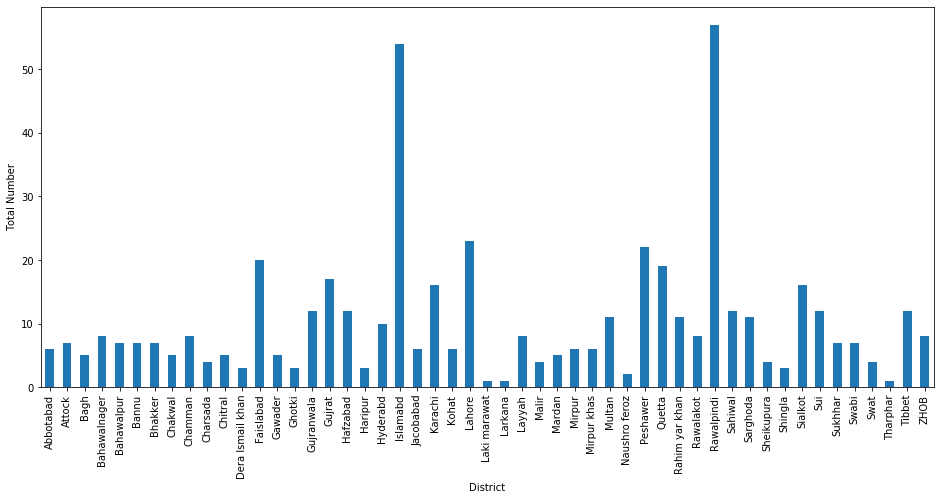

In [15]:
plt.rcParams['figure.figsize']=(16,7)
df_pkg_rates.groupby('from_district')['id'].nunique().plot(kind='bar')
figsize=(28,5)
plt.xlabel('District')
plt.ylabel('Total Number')
plt.show()

# Below The list of counting of total number of sent pacakages city/District

In [14]:
df_pkg_rates['from_district'].count()

517

In [15]:
rwp= df_pkg_rates.from_district.value_counts()['Rawalpindi']
print(rwp)

57


In [16]:
isl= df_pkg_rates.from_district.value_counts()['Islamabd']
print(isl)

54


In [17]:
lhr= df_pkg_rates.from_district.value_counts()['Lahore']
print(lhr)

23


In [18]:
kri= df_pkg_rates.from_district.value_counts()['Karachi']
print(kri)

16


# 2-  Show by graph total number of Packages Received by each District and  find which District is Receiving Most packages

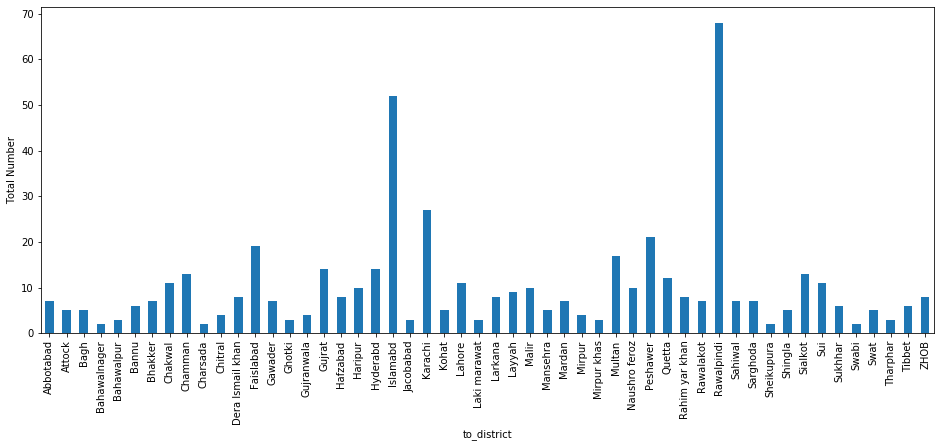

In [18]:
plt.rcParams['figure.figsize']=(16,6)
plt.xlabel('District')
plt.ylabel('Total Number')
df_pkg_rates.groupby('to_district')['id'].nunique().plot(kind='bar')
plt.show()

# Below The list of counting of total number of receive pacakages city/District

In [20]:
rwp= df_pkg_rates.to_district.value_counts()['Rawalpindi']
print(rwp)

68


In [21]:
isl= df_pkg_rates.to_district.value_counts()['Islamabd']
print(isl)

52


In [22]:
lhr= df_pkg_rates.to_district.value_counts()['Lahore']
print(lhr)

11


In [23]:
kri= df_pkg_rates.to_district.value_counts()['Karachi']
print(kri)

27


In [24]:
mul=df_pkg_rates.to_district.value_counts()['Multan']
print(mul)

17


# 3-  Show by graph total number of Packages Sent by each Province and  find which province is Sending Most packages

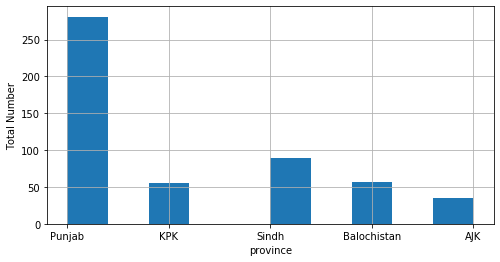

In [25]:
plt.rcParams['figure.figsize']=(8,4)
plt.xlabel('province')
plt.ylabel('Total Number')
df_pkg_rates.to_province.hist()

# To see by Numbering

In [26]:
Sindh= df_pkg_rates.to_province.value_counts()['Sindh']
Sindh

89

In [27]:
Ajk= df_pkg_rates.to_province.value_counts()['AJK']
Ajk

35

In [28]:
Punjab= df_pkg_rates.to_province.value_counts()['Punjab']
Punjab

281

In [29]:
Kpk= df_pkg_rates.to_province.value_counts()['KPK']
Kpk

55

In [30]:
Baloch= df_pkg_rates.to_province.value_counts()['Balochistan']
Baloch

57

# 4- Show by graph total number of Packages Received by each Province and  find which province is Receiving Most packages

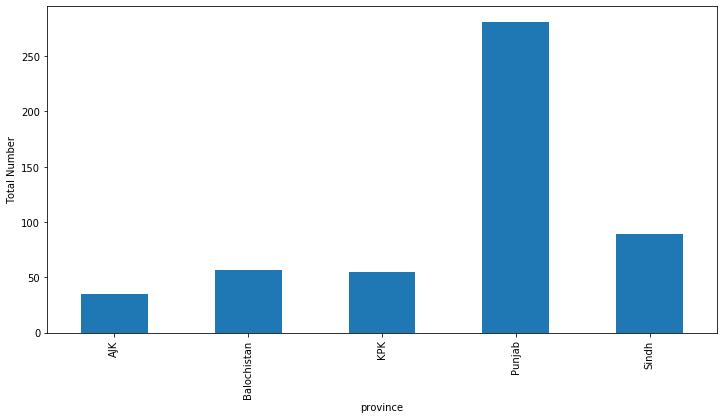

In [19]:
plt.rcParams['figure.figsize']=(12,6)
df_pkg_rates.groupby('to_province')['id'].nunique().plot(kind='bar')
plt.xlabel('province')
plt.ylabel('Total Number')
figsize=(28,5)
plt.show()

# To show by Numbering

In [32]:
Ajk= df_pkg_rates.to_province.value_counts()['AJK']
Ajk

35

In [33]:
Punjab=df_pkg_rates.to_province.value_counts()['Punjab']
Punjab

281

In [34]:
Sindh=df_pkg_rates.to_province.value_counts()['Sindh']
Sindh

89

In [35]:
Kpk=df_pkg_rates.to_province.value_counts()['KPK']
Kpk

55

In [36]:
Baloch=df_pkg_rates.to_province.value_counts()['Balochistan']
Baloch

57

# 5-  Show by graph total number of Packages to see which package is more used

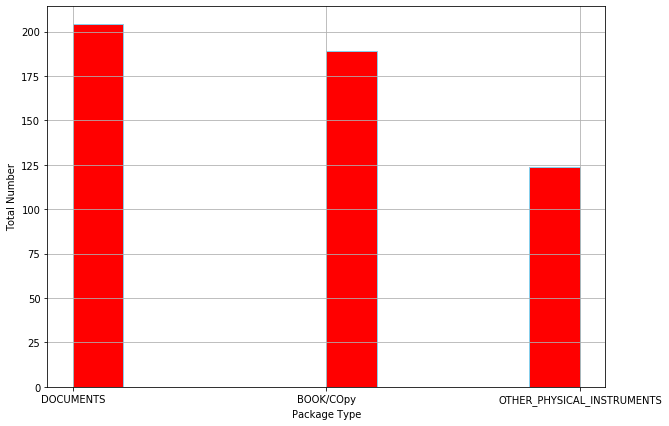

In [26]:

plt.rcParams['figure.figsize']=(10,7)
df_pkg_rates.package_type.hist(color = "red", ec="skyblue")
plt.xlabel('Package Type')
plt.ylabel('Total Number')

plt.show()

# To See by Numbering

In [27]:
docs=df_pkg_rates.package_type.value_counts()['DOCUMENTS']
docs

204

In [29]:
book=df_pkg_rates.package_type.value_counts()['BOOK/COpy']
book

189

In [30]:
pyhsical=df_pkg_rates.package_type.value_counts()['OTHER_PHYSICAL_INSTRUMENTS']
pyhsical

124

In [38]:
df_pkg_rates

,id,price_in_gram,from_district,from_province,to_district,to_province,weight_in_gram,package_type
0,1,5.0,Karachi,Sindh,Rawalpindi,Punjab,10,DOCUMENTS
1,2,8.0,Rawalpindi,Punjab,Islamabd,Punjab,24,BOOK/COpy
2,3,8.0,Islamabd,Punjab,Rawalpindi,Punjab,16,DOCUMENTS
3,4,12.0,Rawalpindi,Punjab,Peshawer,KPK,20,BOOK/COpy
4,5,15.0,Islamabd,Punjab,Chakwal,Punjab,60,OTHER_PHYSICAL_INSTRUMENTS
...,...,...,...,...,...,...,...,...
512,513,119.0,Sheikupura,Punjab,Naushro feroz,Sindh,476,OTHER_PHYSICAL_INSTRUMENTS
513,514,120.0,Haripur,KPK,Naushro feroz,Sindh,480,OTHER_PHYSICAL_INSTRUMENTS
514,515,121.0,Haripur,KPK,Malir,Sindh,484,OTHER_PHYSICAL_INSTRUMENTS
515,516,122.0,Rawalakot,AJK,Malir,Sindh,488,OTHER_PHYSICAL_INSTRUMENTS


# Some Simple Visualization Graphs

In [20]:
df_pkg_rates=df_pkg_rates['id']=1

<h3>  Countplot <3> 

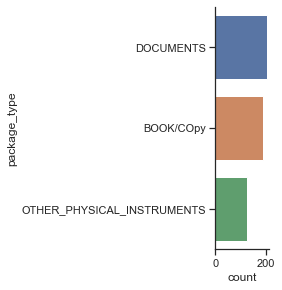

In [22]:
#countplot gud one
import seaborn as sb

sb.catplot(y = 'package_type', data =df_pkg_rates , kind = "count", height = 4)

<h2> Before that we did all analysis with package rates dataset, Now have to deal with Franchise data set <h2>

In [39]:
#here we are opening directly from workbench and then save it in excel form
import pymysql
connection= pymysql.connect(host='localhost',
                                    port=3308,
                                   user='cms',
                                   passwd='01161811024',
                                   database='cms')
query= "select * from cms.location_franchise"

                        

In [40]:
# save to fran.csv
result= pd.read_sql_query(query, connection)
result.to_csv('fran.csv', index=False)


# Data Exploring 
 
 <b> Franchise dataset <b> 

In [32]:
#read file
df_franchise= pd.read_csv('fran.csv')
df_franchise

,id,name,province,city,register_num,num_of_employes,office_starting_timing,office_closing_timing,email,location_id,owner_id
0,1,korangi,Sindh,Karachi,1200,19,2020-03-15 08:00:00,2020-03-15 06:00:00,korangicms@gmail.com,1,1
1,2,Tench,Punjab,Rawalpindi,1201,12,2020-03-15 08:00:00,2020-03-15 06:00:00,tenchcms@gmail.com,2,1
2,3,Quetta Fort,Balochistan,Quetta,1202,19,2020-03-15 08:00:00,2020-03-15 06:00:00,balochistanfortcms@gmail.com,13,1
3,4,Quetta Pishin,Balochistan,Quetta,1203,11,2020-03-15 08:00:00,2020-03-15 06:00:00,balochistanpishincms@gmail.com,14,1
4,5,Sadder,Punjab,Rawalpindi,1208,11,2020-03-15 08:00:00,2020-03-15 06:00:00,saddercms@gmail.com,180,1
...,...,...,...,...,...,...,...,...,...,...,...
140,141,bagan,kpk,Abbotabad,1609,11,2020-03-15 08:00:00,2020-03-15 06:00:00,bagan_cms@gmail.com,129,1
141,142,Bagnotar,kpk,Abbotabad,1611,18,2020-03-15 08:00:00,2020-03-15 06:00:00,bagnotar_cms@gmail.com,130,1
142,143,Biran Gali,kpk,Abbotabad,1614,11,2020-03-15 08:00:00,2020-03-15 06:00:00,birangali_cms@gmail.com,131,1
143,144,Gpo Road Lahore,Punjab,Lahore,1619,19,2020-03-15 08:00:00,2020-03-15 06:00:00,lhr_gporoad_cms@gmail.com,132,1


In [42]:
#To see top 4 rows
df_franchise.head(4)

,id,name,province,city,register_num,num_of_employes,office_starting_timing,office_closing_timing,email,location_id,owner_id
0,1,korangi,Sindh,Karachi,1200,19,2020-03-15 08:00:00,2020-03-15 06:00:00,korangicms@gmail.com,1,1
1,2,Tench,Punjab,Rawalpindi,1201,12,2020-03-15 08:00:00,2020-03-15 06:00:00,tenchcms@gmail.com,2,1
2,3,Quetta Fort,Balochistan,Quetta,1202,19,2020-03-15 08:00:00,2020-03-15 06:00:00,balochistanfortcms@gmail.com,13,1
3,4,Quetta Pishin,Balochistan,Quetta,1203,11,2020-03-15 08:00:00,2020-03-15 06:00:00,balochistanpishincms@gmail.com,14,1


In [43]:
#To see bottom 4 rows
df_franchise.tail(4)

,id,name,province,city,register_num,num_of_employes,office_starting_timing,office_closing_timing,email,location_id,owner_id
141,142,Bagnotar,kpk,Abbotabad,1611,18,2020-03-15 08:00:00,2020-03-15 06:00:00,bagnotar_cms@gmail.com,130,1
142,143,Biran Gali,kpk,Abbotabad,1614,11,2020-03-15 08:00:00,2020-03-15 06:00:00,birangali_cms@gmail.com,131,1
143,144,Gpo Road Lahore,Punjab,Lahore,1619,19,2020-03-15 08:00:00,2020-03-15 06:00:00,lhr_gporoad_cms@gmail.com,132,1
144,145,Multan road(Lahore),Punjab,Lahore,1620,21,2020-03-15 08:00:00,2020-03-15 06:00:00,multanroad_lhr_cms@gmail.com,133,1


# To see all columns and Rows

In [44]:
df_franchise.shape

(145, 11)

In [45]:
df_franchise.columns

Index(['id', 'name', 'province', 'city', 'register_num', 'num_of_employes',
       'office_starting_timing', 'office_closing_timing', 'email',
       'location_id', 'owner_id'],
      dtype='object')

In [46]:
df_franchise.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 11 columns):
id                        145 non-null int64
name                      145 non-null object
province                  145 non-null object
city                      145 non-null object
register_num              145 non-null int64
num_of_employes           145 non-null int64
office_starting_timing    144 non-null object
office_closing_timing     144 non-null object
email                     145 non-null object
location_id               145 non-null int64
owner_id                  145 non-null int64
dtypes: int64(5), object(6)
memory usage: 12.6+ KB


# Statistical Describtion 
<b> Franchise dataset <b>

In [47]:
# numeric data
df_franchise.describe()

,id,register_num,num_of_employes,location_id,owner_id
count,145.000000,145.000000,145.000000,145.000000,145.0
mean,73.000000,1368.551724,19.000000,104.241379,1.0
std,42.001984,178.411701,5.592654,45.916330,0.0
min,1.000000,541.000000,10.000000,1.000000,1.0
25%,37.000000,1249.000000,14.000000,66.000000,1.0
50%,73.000000,1402.000000,19.000000,105.000000,1.0
75%,109.000000,1501.000000,22.000000,144.000000,1.0
max,145.000000,1620.000000,32.000000,180.000000,1.0


In [48]:
# object
df_franchise.describe(include='object')

,name,province,city,office_starting_timing,office_closing_timing,email
count,145,145,145,144,144,145
unique,145,5,39,2,2,145
top,Noor Wah Market,Punjab,Islamabd,2020-03-15 08:00:00,2020-03-15 06:00:00,lalazarcms@gmail.com
freq,1,65,14,124,124,1


# Data Cleaning
<b> Franchise dataset <b>

In [49]:
# to check null
print (df_franchise.isnull().sum())
print ("Total Missing values: " + str(df_franchise.isnull().sum().sum()))

id                        0
name                      0
province                  0
city                      0
register_num              0
num_of_employes           0
office_starting_timing    1
office_closing_timing     1
email                     0
location_id               0
owner_id                  0
dtype: int64
Total Missing values: 2


In [50]:
# well we have two missing values in two columns and it is dirty data but actually we dont requrire both these two columns so we can siply remove them

In [51]:
df_franchise=df_franchise.drop(['owner_id','location_id','office_closing_timing','office_starting_timing'],axis=1)
df_franchise.head()

,id,name,province,city,register_num,num_of_employes,email
0,1,korangi,Sindh,Karachi,1200,19,korangicms@gmail.com
1,2,Tench,Punjab,Rawalpindi,1201,12,tenchcms@gmail.com
2,3,Quetta Fort,Balochistan,Quetta,1202,19,balochistanfortcms@gmail.com
3,4,Quetta Pishin,Balochistan,Quetta,1203,11,balochistanpishincms@gmail.com
4,5,Sadder,Punjab,Rawalpindi,1208,11,saddercms@gmail.com


In [52]:
# for checking other anamolies/outliers

In [53]:
# Outliers
data_mean = mean(df_franchise._get_numeric_data())
data_std = std(df_franchise._get_numeric_data())
# identify outliers
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off
# identify outliers
total_outliers = 0
for i, x in enumerate(df_franchise):
    if not i == 0:
        print ("Outliers in: " + str(x) + ": ")
        try:
            outliers = dataframe[df_franchise[x] > df_franchise[x].mean() + 3 * df_franchise[x].std()]
            print (len(outliers))
            total_outliers += outliers
        except:
            print("0")
#outliers = [x for x in dff[] if x < lower or x > upper]
#print('Identified outliers: %d' % len(outliers))
# remove outliers
#outliers_removed = [x for x in dff if x >= lower and x <= upper]
#print('Non-outlier observations: %d' % len(outliers_removed))

Outliers in: name: 
0
Outliers in: province: 
0
Outliers in: city: 
0
Outliers in: register_num: 
0
Outliers in: num_of_employes: 
0
Outliers in: email: 
0


<b> now having very clean Dataset Franchise dataset as well <b>

# Data Anlysis  And visualization

# 6- Show By graph total number of franchisesTo see which city has more franchises?

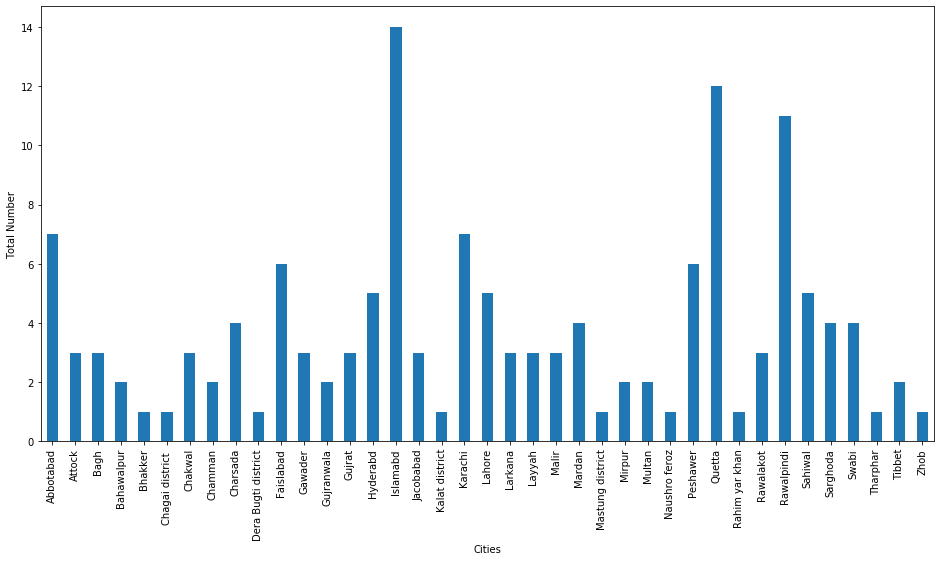

In [37]:
plt.rcParams['figure.figsize']=(16,8)
df_franchise.groupby('city')['id'].nunique().plot(kind='bar')
plt.xlabel("Cities")
plt.ylabel("Total Number")
figsize=(28,5)
plt.show()

# To see by Numbering Most Franchises

In [55]:
isl= df_franchise.city.value_counts()['Islamabd']
print(isl)

14


In [56]:
rwp= df_franchise.city.value_counts()['Rawalpindi']
print(rwp)

11


In [57]:
que= df_franchise.city.value_counts()['Quetta']
print(que)

12


In [38]:
lhr= df_franchise.city.value_counts()['Lahore']
print(lhr)

5


In [39]:
krc= df_franchise.city.value_counts()['Karachi']
print(krc)

7


# 7- Show By graph total number of franchisesTo see which Province has more franchises?

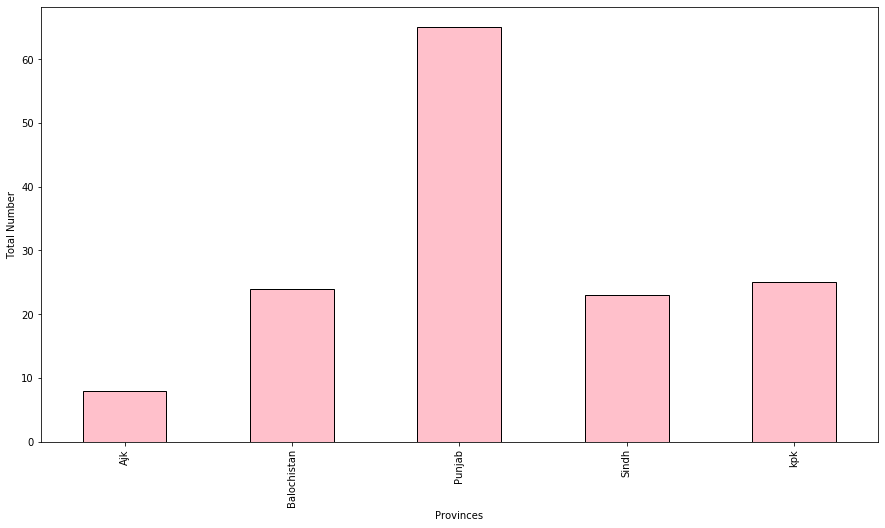

In [46]:

plt.rcParams['figure.figsize']=(15,8)
df_franchise.groupby('province')['id'].nunique().plot(kind='bar',color = "pink", ec="black")
plt.xlabel("Provinces")
plt.ylabel("Total Number")
figsize=(28,5)
plt.show()

# To see by Numbering Province Franchise's 

In [59]:
Baloch=df_franchise.province.value_counts()['Balochistan']
Baloch

24

In [60]:
punjab=df_franchise.province.value_counts()['Punjab']
punjab

65

In [61]:
sindh=df_franchise.province.value_counts()['Sindh']
sindh

23

In [62]:
Ajk=df_franchise.province.value_counts()['Ajk']
Ajk

8

In [63]:
sindh=df_franchise.province.value_counts()['Sindh']
sindh

23

In [64]:
kpk=df_franchise.province.value_counts()['kpk']
kpk

25

# 8- Show by Graph Which Franchise has more Number of employes

<b> for this we have to change some data accordingling <b> 

In [47]:
df_franchise['id'] = 1
query_8 = '''SELECT sum("Index") as total , "num_of_employes","name","email"  FROM df_franchise group by "num_of_employes";'''
res_8 = pysqldf(query_8)
res_8.head()

,total,num_of_employes,name,email
0,0.0,10,Dar-ul-Islam,darulislamicms@gmail.com
1,0.0,11,Quetta Pishin,balochistanpishincms@gmail.com
2,0.0,12,Tench,tenchcms@gmail.com
3,0.0,13,Sangseela(Dera_Bughti) Branch,sangseela_dera_bughti_branchcms@gmail.com
4,0.0,14,H4_Branch,h4cms@gmail.com


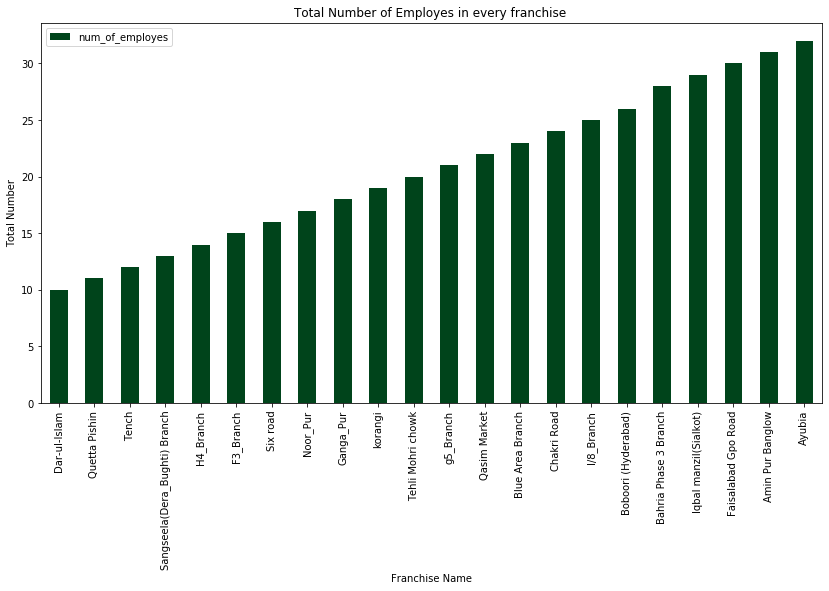

In [53]:
#using bar graph for visualize and analysis
res_8.plot.bar(y='num_of_employes', x='name' , colormap='BuGn_r', title='Total Number of Employes in every franchise ')
plt.gcf().set_size_inches(14, 7)
plt.xlabel("Franchise Name")
plt.ylabel("Total Number")


plt.show()

# Now have to look the third and last dataset user.csv

# Exploring Dataset
 <b> User dataset <b>

In [57]:
df_user=pd.read_csv(r'user1.csv')
df_user.head(2)

,id,created,first_name,last_name,email,city_name,town_name,village_name,phone_number,cnic,...,admin_id,driver_id,franchise_id,manager_id,owner_id,post_person_id,receiver_id,sender_id,staff_id,usertype_id
0,1,2020-03-15 07:34:41.303364,Khawaja,Rehaman,khawajarehmancms@gmail.com,Karachi,NaN,NaN,0301689054,37403123456103,...,0,0,1,0,1,0,0,0,0,6
1,2,2020-03-15 07:36:33.941466,Ali,Azmat,aliazmatcms@gmail.com,Islamabad,NaN,NaN,0301689053,37405123456101,...,0,0,17,0,1,0,0,0,0,3


In [58]:
df_user.tail(2)

,id,created,first_name,last_name,email,city_name,town_name,village_name,phone_number,cnic,...,admin_id,driver_id,franchise_id,manager_id,owner_id,post_person_id,receiver_id,sender_id,staff_id,usertype_id
115,118,2020-03-15 10:25:51.038888,Khadim,Sahb,khadim@gmail.com,Islamabad,NaN,NaN,NaN,NaN,...,0,0,15,0,1,0,0,0,0,4
116,119,2020-07-06 07:45:42.281596,Ishtiaq,Hussain,ishtiaqcms@gmail.com,Rawalpindi,NaN,NaN,0330-1676411,37405-1567000-0,...,0,0,9,0,1,0,0,0,0,7


# To See all columns and rows info

In [59]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 27 columns):
id                        117 non-null int64
created                   117 non-null object
first_name                117 non-null object
last_name                 117 non-null object
email                     117 non-null object
city_name                 114 non-null object
town_name                 0 non-null float64
village_name              0 non-null float64
phone_number              115 non-null object
cnic                      115 non-null object
gender                    117 non-null object
province                  117 non-null object
district                  117 non-null object
sector                    117 non-null object
street                    117 non-null int64
house_no                  117 non-null int64
driver_liesence_number    1 non-null float64
admin_id                  117 non-null int64
driver_id                 117 non-null int64
franchise_id              117

In [60]:
df_user.columns

Index(['id', 'created', 'first_name', 'last_name', 'email', 'city_name',
       'town_name', 'village_name', 'phone_number', 'cnic', 'gender',
       'province', 'district', 'sector', 'street', 'house_no',
       'driver_liesence_number', 'admin_id', 'driver_id', 'franchise_id',
       'manager_id', 'owner_id', 'post_person_id', 'receiver_id', 'sender_id',
       'staff_id', 'usertype_id'],
      dtype='object')

# Statistical Description 

In [61]:
df_user.describe()

,id,town_name,village_name,street,house_no,driver_liesence_number,admin_id,driver_id,franchise_id,manager_id,owner_id,post_person_id,receiver_id,sender_id,staff_id,usertype_id
count,117.000000,0.0,0.0,117.000000,117.000000,1.0,117.0,117.0,117.000000,117.000000,117.0,117.0,117.0,117.0,117.0,117.000000
mean,60.846154,NaN,NaN,139.205128,1593.854701,6523.0,0.0,0.0,48.461538,0.068376,1.0,0.0,0.0,0.0,0.0,1.316239
std,34.169359,NaN,NaN,296.283518,1634.106074,NaN,0.0,0.0,56.801004,0.583191,0.0,0.0,0.0,0.0,0.0,1.119187
min,1.000000,NaN,NaN,1.000000,1.000000,6523.0,0.0,0.0,1.000000,0.000000,1.0,0.0,0.0,0.0,0.0,1.000000
25%,32.000000,NaN,NaN,6.000000,126.000000,6523.0,0.0,0.0,2.000000,0.000000,1.0,0.0,0.0,0.0,0.0,1.000000
50%,61.000000,NaN,NaN,10.000000,1045.000000,6523.0,0.0,0.0,15.000000,0.000000,1.0,0.0,0.0,0.0,0.0,1.000000
75%,90.000000,NaN,NaN,109.000000,3211.000000,6523.0,0.0,0.0,82.000000,0.000000,1.0,0.0,0.0,0.0,0.0,1.000000
max,119.000000,NaN,NaN,902.000000,5019.000000,6523.0,0.0,0.0,144.000000,6.000000,1.0,0.0,0.0,0.0,0.0,7.000000


In [62]:
df_user.describe(include="object")

,created,first_name,last_name,email,city_name,phone_number,cnic,gender,province,district,sector
count,117,117,117,117,114,115,115,117,117,117,117
unique,117,19,19,20,7,17,17,2,4,7,11
top,2020-03-15 08:55:46.617946,Faisal,Jillani,faisalsatti@gmail.com,Rawalpindi,03105755950,37303143456903,M,Punjab,Rawalpindi,korangi
freq,1,15,15,15,29,15,15,90,62,41,25


# Data Cleaning
<b> User dataset <b> 

In [63]:
# to check null
print (df_user.isnull().sum())
print ("Total Missing values: " + str(df_user.isnull().sum().sum()))

id                          0
created                     0
first_name                  0
last_name                   0
email                       0
city_name                   3
town_name                 117
village_name              117
phone_number                2
cnic                        2
gender                      0
province                    0
district                    0
sector                      0
street                      0
house_no                    0
driver_liesence_number    116
admin_id                    0
driver_id                   0
franchise_id                0
manager_id                  0
owner_id                    0
post_person_id              0
receiver_id                 0
sender_id                   0
staff_id                    0
usertype_id                 0
dtype: int64
Total Missing values: 357


In [64]:
# Drop columns which are not useful
df_user=df_user.drop(["created","driver_liesence_number",'admin_id','driver_id', 'franchise_id',
       'manager_id', 'owner_id', 'post_person_id', 'receiver_id', 'sender_id',
       'staff_id','town_name','village_name','driver_liesence_number','phone_number'], axis=1)

In [65]:
df_user.head()

,id,first_name,last_name,email,city_name,cnic,gender,province,district,sector,street,house_no,usertype_id
0,1,Khawaja,Rehaman,khawajarehmancms@gmail.com,Karachi,37403123456103,M,Sindh,Karachi,karongi,1,12,6
1,2,Ali,Azmat,aliazmatcms@gmail.com,Islamabad,37405123456101,M,Punjab,Islamabd,karongi,1,10,3
2,3,Zubair,Hussain,zubairhussaincms@gmail.com,Islamabad,37405123456111,M,Punjab,Islamabd,Soan,1,33,7
3,4,Kashif,Shah,kashifshahcms@gmail.com,Islamabad,37405123456211,M,Punjab,Islamabd,Soan,23,323,4
4,5,hadii,mir,hadimircms@gmail.com,Islamabad,37405123456511,M,Punjab,Islamabd,Soan,12,313,5


In [66]:
# drop only those rows having cnic and city_name = Null and we cant fill them by mean or most frequent so better to remove rows
df_user.dropna(inplace=True)


In [67]:
# outliers
data_mean = mean(df_user._get_numeric_data())
data_std = std(df_user._get_numeric_data())
# identify outliers
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off
# identify outliers
total_outliers = 0
for i, x in enumerate(df_user):
    if not i == 0:
        print ("Outliers in: " + str(x) + ": ")
        try:
            outliers = dataframe[df_user[x] > df_user[x].mean() + 3 * df_user[x].std()]
            print (len(outliers))
            total_outliers += outliers
        except:
            print("0")

Outliers in: first_name: 
0
Outliers in: last_name: 
0
Outliers in: email: 
0
Outliers in: city_name: 
0
Outliers in: cnic: 
0
Outliers in: gender: 
0
Outliers in: province: 
0
Outliers in: district: 
0
Outliers in: sector: 
0
Outliers in: street: 
0
Outliers in: house_no: 
0
Outliers in: usertype_id: 
0


# Data Analysis And Visualization in user csv

In [68]:
df_user['id']=1
df_user.head()

,id,first_name,last_name,email,city_name,cnic,gender,province,district,sector,street,house_no,usertype_id
0,1,Khawaja,Rehaman,khawajarehmancms@gmail.com,Karachi,37403123456103,M,Sindh,Karachi,karongi,1,12,6
1,1,Ali,Azmat,aliazmatcms@gmail.com,Islamabad,37405123456101,M,Punjab,Islamabd,karongi,1,10,3
2,1,Zubair,Hussain,zubairhussaincms@gmail.com,Islamabad,37405123456111,M,Punjab,Islamabd,Soan,1,33,7
3,1,Kashif,Shah,kashifshahcms@gmail.com,Islamabad,37405123456211,M,Punjab,Islamabd,Soan,23,323,4
4,1,hadii,mir,hadimircms@gmail.com,Islamabad,37405123456511,M,Punjab,Islamabd,Soan,12,313,5


# Q 9- Find the All males senders who used services to show who mostly used service in males

In [69]:
# sql queryy
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())
query_9 = '''SELECT Sum("id") as total , "email" FROM df_user where "usertype_id" = "1" and gender="M" group by "email";'''
res_9 = pysqldf(query_9)
res_9

,total,email
0,9,alihamza@gmail.com
1,15,faisalsatti@gmail.com
2,11,khawajameer@gmail.com
3,13,tahaqamer@gamil.com
4,14,usamariaz@gamil.com
5,5,usmanshareef@gamil.com
6,9,zainabbasi@gamil.com


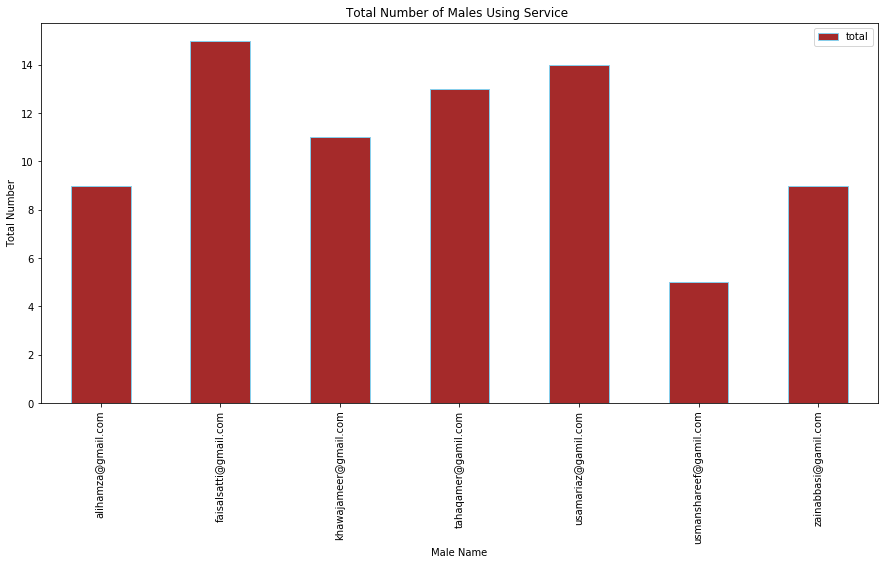

In [73]:

res_9.plot.bar(x='email', y='total' ,  color = "brown", ec="skyblue", title='Total Number of Males Using Service ')
plt.gcf().set_size_inches(15, 7)
plt.xlabel("Male Name")
plt.ylabel("Total Number")
plt.show()

# Q 10- Find the All Females senders who used services to show who mostly used service in females

In [82]:
# sql queryy
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())
query_10 = '''SELECT Sum("id") as total , "email" FROM df_user where "usertype_id" = "1" and gender="F" group by "email";'''
res_10 = pysqldf(query_10)
res_10

,total,email
0,13,nayab@gamil.com
1,14,zille@gmail.com


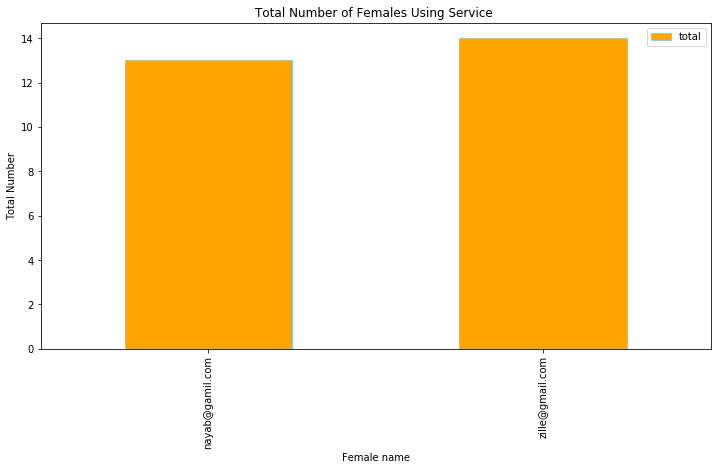

In [98]:

res_10.plot.bar(x='email', y='total' ,color = "orange", ec="skyblue", title='Total Number of Females Using Service ')
plt.gcf().set_size_inches(12, 6)
plt.xlabel("Female name")
plt.ylabel("Total Number")
plt.show()

# Q 11- Display All senders using bar graph to find who mostly used our service

In [99]:
# sql queryy
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())
query_11 = '''SELECT Sum("id") as total  ,"email","gender" FROM df_user where "usertype_id"="1"  group by "email";'''
res_11 = pysqldf(query_11)
res_11

,total,email,gender
0,9,alihamza@gmail.com,M
1,15,faisalsatti@gmail.com,M
2,11,khawajameer@gmail.com,M
3,13,nayab@gamil.com,F
4,13,tahaqamer@gamil.com,M
5,14,usamariaz@gamil.com,M
6,5,usmanshareef@gamil.com,M
7,9,zainabbasi@gamil.com,M
8,14,zille@gmail.com,F


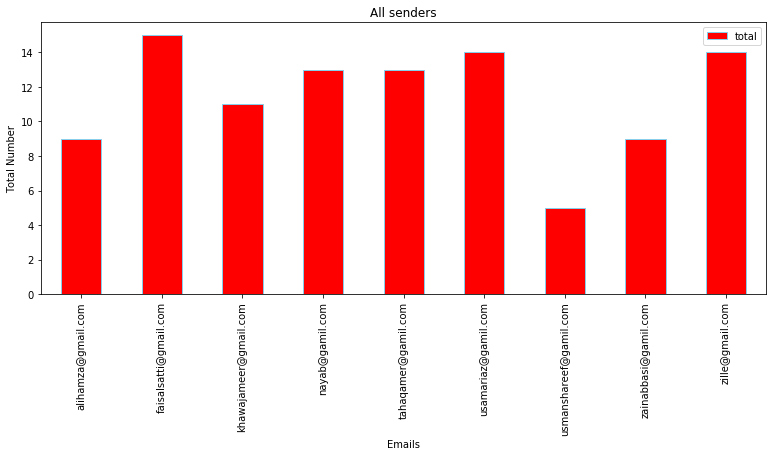

In [101]:

res_11.plot.bar(x='email', y='total' , color = "red", ec="skyblue", title='All senders')
plt.gcf().set_size_inches(13, 5)
plt.xlabel("Emails")
plt.ylabel("Total Number")
plt.show()

# Q 12- Display All senders using bar graph to find which sector's people  mostly used our service

In [102]:
# sql queryy
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())
query_12 = '''SELECT Sum("id") as total ,"sector" FROM df_user where "usertype_id"="1"  group by "sector";'''
res_12 = pysqldf(query_12)
res_12

,total,sector
0,5,Ayubia
1,15,Bacha Khan Monument
2,22,Blue Area
3,14,bostan
4,13,kamalabad
5,20,korangi
6,14,tench


In [90]:
#just for check
sect=df_user.sector.value_counts()['Ayubia']
sect

5

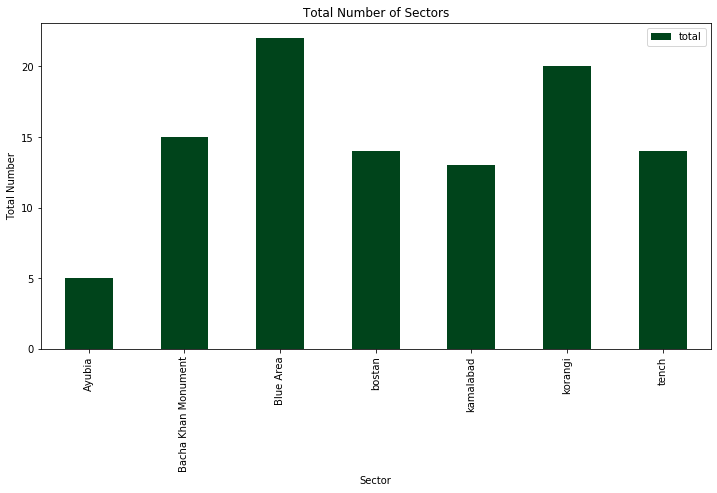

In [105]:
# Visualization

res_12.plot.bar(x='sector', y='total' , colormap='BuGn_r', title='Total Number of Sectors')
plt.gcf().set_size_inches(12, 6)
plt.xlabel("Sector")
plt.ylabel("Total Number")
plt.show()

<b> Analysis End <b>

In [94]:
df_pkg_rates.head(2)

,id,price_in_gram,from_district,from_province,to_district,to_province,weight_in_gram,package_type
0,1,5.0,Karachi,Sindh,Rawalpindi,Punjab,10,DOCUMENTS
1,2,8.0,Rawalpindi,Punjab,Islamabd,Punjab,24,BOOK/COpy


# Machine learning Decision Tree

In [110]:
from sklearn.tree import DecisionTreeClassifier
X=df_pkg_rates.drop(columns=['from_district','to_district','id','from_province','to_province',
'package_type'])
X


,price_in_gram,weight_in_gram
0,5.0,10
1,8.0,24
2,8.0,16
3,12.0,20
4,15.0,60
...,...,...
512,119.0,476
513,120.0,480
514,121.0,484
515,122.0,488


In [111]:
Y=df_pkg_rates['package_type']
Y.head(4)

0    DOCUMENTS
1    BOOK/COpy
2    DOCUMENTS
3    BOOK/COpy
Name: package_type, dtype: object

In [108]:
model=DecisionTreeClassifier()
model.fit(X,Y)
predictions=model.predict([[5,10]])
predictions

array(['DOCUMENTS'], dtype=object)

In [109]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X=X
Y=Y
X_train, X_test, Y_train, Y_test=train_test_split(X,Y, test_size=0.2)
model=DecisionTreeClassifier()
model.fit(X_train, Y_train)  
predictions=model.predict(X_test)
score=accuracy_score(Y_test, predictions)
score

0.9615384615384616

<b> Model was very good , accuracy was 98 % <b>

 # Machine Learning Algorithm Random Forest

In [124]:
# random Forest
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
regressor = RandomForestClassifier(n_estimators=20, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
y_pred[:6]

array(['DOCUMENTS', 'OTHER_PHYSICAL_INSTRUMENTS', 'DOCUMENTS',
       'DOCUMENTS', 'BOOK/COpy', 'BOOK/COpy'], dtype=object)

In [117]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[35  0  1]
 [ 2 42  0]
 [ 1  0 23]]
                            precision    recall  f1-score   support

                 BOOK/COpy       0.92      0.97      0.95        36
                 DOCUMENTS       1.00      0.95      0.98        44
OTHER_PHYSICAL_INSTRUMENTS       0.96      0.96      0.96        24

                  accuracy                           0.96       104
                 macro avg       0.96      0.96      0.96       104
              weighted avg       0.96      0.96      0.96       104

0.9615384615384616


<b> that was good as well, with 96% accuracy <b>

 # Machine Learning Simple Linear Regression
  <b> 1 input, 1 target <b>

In [291]:
df_pkg_rates=pd.read_csv(r'pacakagerates2.csv')
df_pkg_rates.head(2)

,id,price_in_gram,from_district,from_province,to_district,to_province,weight_in_gram,package_type
0,1,5.0,Karachi,Sindh,Rawalpindi,Punjab,10,DOCUMENTS
1,2,8.0,Rawalpindi,Punjab,Islamabd,Punjab,24,BOOK/COpy


In [292]:
df_pkg_rates=df_pkg_rates.drop(columns=['from_district','to_district','id','from_province','to_province','package_type'])
df_pkg_rates.head(2)

,price_in_gram,weight_in_gram
0,5.0,10
1,8.0,24


In [210]:
df_pkg_rates.corr()

,price_in_gram,weight_in_gram
price_in_gram,1.000000,0.921499
weight_in_gram,0.921499,1.000000


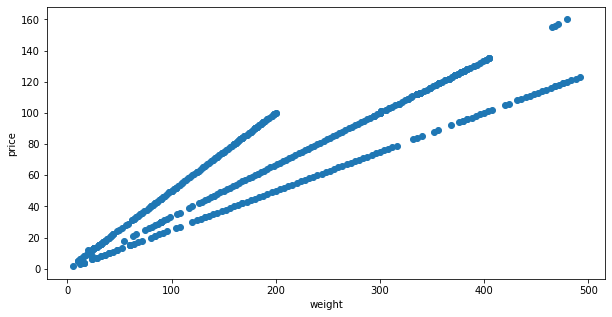

In [295]:
plt.scatter(df_pkg_rates['weight_in_gram'], df_pkg_rates['price_in_gram'])
plt.gcf().set_size_inches(10, 5)
plt.xlabel("weight")
plt.ylabel("price")
plt.show()

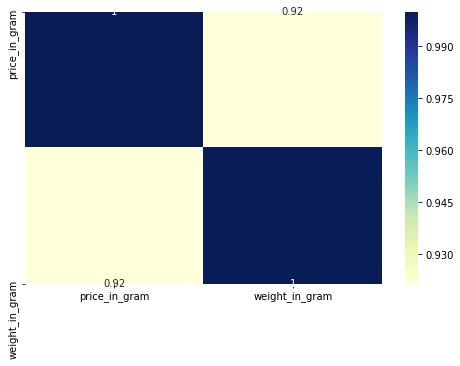

In [212]:
plt.figure(figsize = (8, 5))
sns.heatmap(df_pkg_rates.corr(), annot = True, cmap="YlGnBu")
plt.show()

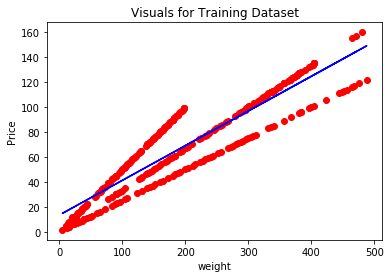

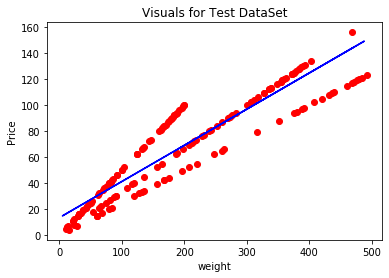

In [222]:
# select x and y and split
X = np.array(df_pkg_rates['weight_in_gram']).reshape(-1, 1)
Y = np.array(df_pkg_rates['price_in_gram'])
xtrain, xtest, ytrain, ytest = train_test_split(X,Y,test_size=1/3, random_state=0)
from sklearn.model_selection import train_test_split

#Fitting simple linear regression to the Training Set
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression()
regressor.fit(xtrain, ytrain)

#Predicting the prices
pred = regressor.predict(xtest)

#Visualizing the training Test Results 
plt.scatter(xtrain, ytrain, color= 'red')
plt.plot(xtrain, regressor.predict(xtrain), color = 'blue')
plt.title ("Visuals for Training Dataset")
plt.xlabel("weight")
plt.ylabel("Price")
plt.show()

#Visualizing the Test Results 
plt.scatter(xtest, ytest, color= 'red')
plt.plot(xtrain, regressor.predict(xtrain), color = 'blue')
plt.title("Visuals for Test DataSet")
plt.xlabel("weight")
plt.ylabel("Price")
plt.show()


In [214]:
Yhat=regressor.predict(xtest)
Yhat[:3]

array([20.05746388, 62.35392378, 25.06625518])

In [286]:
Yhat=regressor.predict(xtrain)
Yhat[:3]

array([66.80618272, 94.35453489, 59.01472958])

In [220]:
# Accuracy
accuracy = regressor.score(xtest,ytest)
print(accuracy*100,'%')

84.18643862605614 %


In [277]:
# Prediction by self given number
Yhat=regressor.predict([[16]])
Yhat

array([17.83133441])

# Multiple linear Regression
<b> Many Input, and target <b>

In [296]:
df_pkg_rates=pd.read_csv(r'pacakagerates2.csv')
df_pkg_rates.head(2)

,id,price_in_gram,from_district,from_province,to_district,to_province,weight_in_gram,package_type
0,1,5.0,Karachi,Sindh,Rawalpindi,Punjab,10,DOCUMENTS
1,2,8.0,Rawalpindi,Punjab,Islamabd,Punjab,24,BOOK/COpy


In [297]:
df_pkg_rates=df_pkg_rates.drop(columns=['from_district','to_district','id','from_province','to_province'])
df_pkg_rates.head(2)


,price_in_gram,weight_in_gram,package_type
0,5.0,10,DOCUMENTS
1,8.0,24,BOOK/COpy


In [298]:
df_pkg_rates=pd.get_dummies(df_pkg_rates)
df_pkg_rates.head(2)

,price_in_gram,weight_in_gram,package_type_BOOK/COpy,package_type_DOCUMENTS,package_type_OTHER_PHYSICAL_INSTRUMENTS
0,5.0,10,0,1,0
1,8.0,24,1,0,0


In [300]:
df_pkg_rates.corr()

,price_in_gram,weight_in_gram,package_type_BOOK/COpy,package_type_DOCUMENTS,package_type_OTHER_PHYSICAL_INSTRUMENTS
price_in_gram,1.000000,0.921499,0.469494,-0.327159,-0.155041
weight_in_gram,0.921499,1.000000,0.458316,-0.576632,0.143130
package_type_BOOK/COpy,0.469494,0.458316,1.000000,-0.612826,-0.426392
package_type_DOCUMENTS,-0.327159,-0.576632,-0.612826,1.000000,-0.453479
package_type_OTHER_PHYSICAL_INSTRUMENTS,-0.155041,0.143130,-0.426392,-0.453479,1.000000


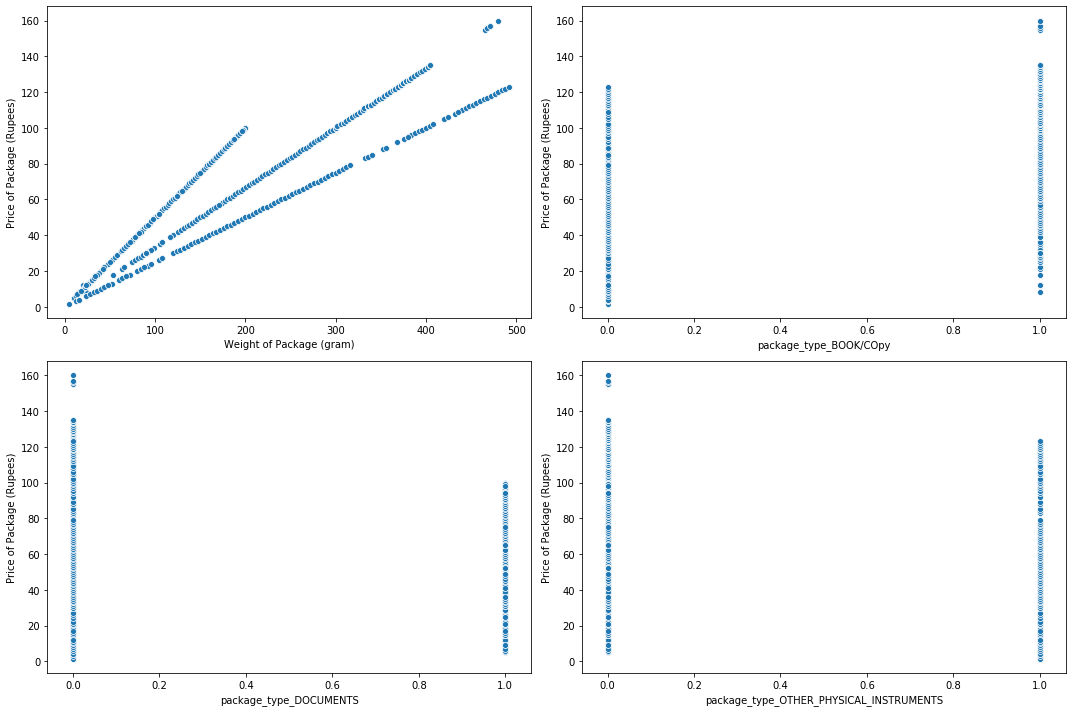

In [301]:
fig, axs = plt.subplots(2,2,figsize=(15,10))
plt1 = sns.scatterplot(x = 'weight_in_gram', y = 'price_in_gram', data = df_pkg_rates, ax = axs[0,0])
plt1.set_xlabel('Weight of Package (gram)')
plt1.set_ylabel('Price of Package (Rupees)')
plt2 = sns.scatterplot(x = 'package_type_BOOK/COpy', y = 'price_in_gram', data = df_pkg_rates, ax = axs[0,1])
plt2.set_xlabel('package_type_BOOK/COpy')
plt2.set_ylabel('Price of Package (Rupees)')
plt3 = sns.scatterplot(x = 'package_type_DOCUMENTS', y = 'price_in_gram', data = df_pkg_rates, ax = axs[1,0])
plt3.set_xlabel('package_type_DOCUMENTS')
plt3.set_ylabel('Price of Package (Rupees)')
plt3 = sns.scatterplot(x = 'package_type_OTHER_PHYSICAL_INSTRUMENTS', y = 'price_in_gram', data = df_pkg_rates, ax = axs[1,1])
plt3.set_xlabel('package_type_OTHER_PHYSICAL_INSTRUMENTS')
plt3.set_ylabel('Price of Package (Rupees)')
plt.tight_layout()

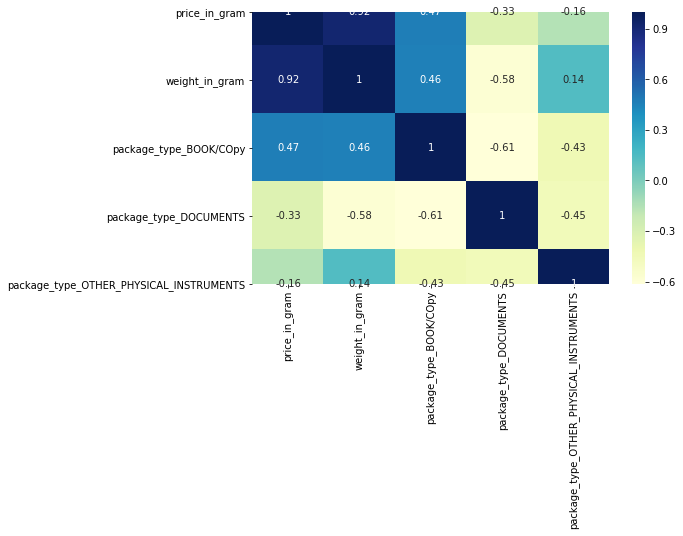

In [236]:
plt.figure(figsize = (8, 5))
sns.heatmap(df_pkg_rates.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [302]:
Y = df_pkg_rates.pop('price_in_gram')
X = df_pkg_rates

In [303]:
X.head(2)

,weight_in_gram,package_type_BOOK/COpy,package_type_DOCUMENTS,package_type_OTHER_PHYSICAL_INSTRUMENTS
0,10,0,1,0
1,24,1,0,0


In [304]:
Y.head(2)

0    5.0
1    8.0
Name: price_in_gram, dtype: float64

In [190]:
from sklearn.model_selection import train_test_split

In [243]:
x_train, x_test,y_train,y_test = train_test_split(X,Y,test_size =0.2)
# print the data
x_train.head()

,weight_in_gram,package_type_BOOK/COpy,package_type_DOCUMENTS,package_type_OTHER_PHYSICAL_INSTRUMENTS
252,80,0,1,0
36,162,1,0,0
4,60,0,0,1
237,80,0,1,0
192,471,1,0,0


In [244]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()

In [245]:
clf.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [247]:
pre=clf.predict(x_test)
pre[:6]

array([111.13533113,  72.00712215,  61.14985684, 126.38825213,
       126.38825213, 122.85019215])

In [255]:
pre1=clf.predict(x_train)
pre1[:6]

array([ 44.62585909,  55.84349251,   3.36897765,  44.62585909,
       154.03417145,  62.51664545])

In [256]:
# Accuracy
clf.score(x_test,y_test)

0.9489096734057452

In [259]:
import sklearn.metrics as metrics

print('MAE:', metrics.mean_absolute_error(y_test, pre))
print('MSE:', metrics.mean_squared_error(y_test, pre))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pre)))


MAE: 6.3926951530199005
MSE: 72.12725509899153
RMSE: 8.492776642476331


In [260]:
import sklearn.metrics as metrics

print('MAE:', metrics.mean_absolute_error(y_train, pre1))
print('MSE:', metrics.mean_squared_error(y_train, pre1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, pre1)))


MAE: 6.441619147402079
MSE: 72.74557746347921
RMSE: 8.529101796993585


In [267]:
Yhat=clf.predict([[16,0,1,0]])
Yhat

array([24.28863109])